To cluster the documents and annotate the clusters according to the main topic, we can use various natural language 
processing and machine learning techniques. Here is a general framework that can be used to accomplish this task:

1.Load the dataset into a pandas dataframe.
2.Clean the data by removing any null values or duplicates.
3.Preprocess the textual data (i.e., the abstracts) by removing stopwords, punctuation, and other noise. This can be done using various libraries like NLTK or spaCy.
4.Convert the preprocessed abstracts into a numerical representation using a technique like TF-IDF or Doc2Vec.
5. Find the relevant document 
6.To find the main topic of each document, we will use a topic modeling algorithm such as Latent Dirichlet Allocation (LDA) or Non-negative Matrix Factorization (NMF)
6.For clustering and visualization, we will use a dimensionality reduction technique such as Principal Component Analysis (PCA) or t-SNE, and a visualization library such as bokeh.''' 

In [1]:

import nltk 
from nltk.tokenize import word_tokenize,sent_tokenize

'''Pakages to load dataset'''
import pandas as pd

import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize
from sklearn.decomposition import NMF
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

from bokeh.plotting import figure, show, output_file, ColumnDataSource
from bokeh.models import HoverTool


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 


nltk.download('punkt')
nltk.download('stopwords')

from sklearn.metrics.pairwise import cosine_similarity



C:\Users\sitas\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\sitas\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\sitas\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sitas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sitas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
data = pd.read_csv("Data_mesh_cleaned.csv")
pdf_data = data.copy()


In [7]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize
from sklearn.decomposition import NMF

def NMF_modeling(df_data, components):
    df = df_data.copy()

    # Initialize TF-IDF vectorizer
    model = TfidfVectorizer(stop_words='english', ngram_range=(2, 2))

    # Fit and transform the TF-IDF matrix
    word_vector = normalize(model.fit_transform(df['pdf_content']))

    # Fit NMF model
    nmf_model = NMF(n_components=components, init='nndsvd')
    nmf_model.fit(word_vector)

    # Assign the dominant topic to each document
    df['topic'] = nmf_model.transform(word_vector).argmax(axis=1)

    topic_words = []
    n_words = 50

    feature_names = model.get_feature_names_out()

    # Extract top words for each topic and calculate TF-IDF scores
    topic_tfidf_scores = []

    for topic_idx, topic in enumerate(nmf_model.components_):
        top_words_idx = topic.argsort()[:-n_words - 1:-1]
        top_words = [feature_names[i] for i in top_words_idx]
        topic_words.append(', '.join(top_words))

        # Get TF-IDF scores for the top words
        tfidf_scores = [model.idf_[model.vocabulary_[word]] for word in top_words]
        topic_tfidf_scores.extend(tfidf_scores * len(df))  # Extend the list

    df['topic_words'] = [topic_words[i] for i in df['topic']]
    df['topic_tfidf_scores'] = topic_tfidf_scores[:len(df)]  # Ensure the length matches the DataFrame

    # Transform the topic_words column into a TF-IDF matrix
    tfidf_matrix = model.transform(df['topic_words'])
    dominant_words = []

    # Extract dominant word for each document
    for i in range(len(df)):
        row = tfidf_matrix[i]
        dominant_word_idx = row.argmax()
        dominant_word = model.get_feature_names_out()[dominant_word_idx]
        dominant_words.append(dominant_word)

    # Add the dominant_word column to the DataFrame
    df['dominant_word'] = dominant_words

    return df, model

# Example usage:
pdf_data = pd.read_csv("Data_mesh_cleaned.csv")
result, tfidf_model = NMF_modeling(pdf_data, components=20)


In [8]:
result,tfidf_model  = NMF_modeling(pdf_data, components = 20)

In [9]:
result

,pdf_name,pdf_content,topic,topic_words,topic_tfidf_scores,dominant_word
0,0670.pdf,introducing city platform design marcin kryste...,13,"digital twin, user scenario, number different,...",3.233592,center poznań
1,1-s2.0-S1877050921022365-main.pdf,author http license scientific committee syste...,18,"committee projman, internet cited, http licens...",1.693147,concept big
2,1-s2.0-S1877050923006099-main.pdf,author http license scientific committee progr...,4,"monitoring product, serve infrastructure, self...",2.540445,cloud adoption
3,2302.01713.pdf,practice avoid mess jan bode germany niklas kü...,2,"motivational factor, challenge practice, techn...",3.233592,factor challenge
4,2304.01062.pdf,systematic gray abel goedegebuure indika kumar...,0,"composite product, self serve, systematic gray...",3.233592,product product
5,978-1-4842-9253-2.pdf,fabric approach ai guide ai cataloging integra...,16,"knowledge catalog, ai ml, hybrid cloud, ai mod...",2.945910,accessed september
6,978-3-031-12423-5_7.pdf,cok survey privacy challenge relation mesh nik...,10,"quasi identi, erential privacy, identi er, hig...",3.233592,podlesny kayem
7,978-3-031-36118-0.pdf,lecture note engineering communication technol...,19,"infrared image, classi cation, neural network,...",3.233592,college university
8,978-3-031-39847-6_1.pdf,integration revitalized warehouse lake robert ...,6,"integration warehouse, black box, optimization...",3.233592,tjoa khalil
9,978-3-031-45021-1_23.pdf,converging microservice principle uni logical ...,15,"microservice principle, converging microservic...",3.233592,componentization product


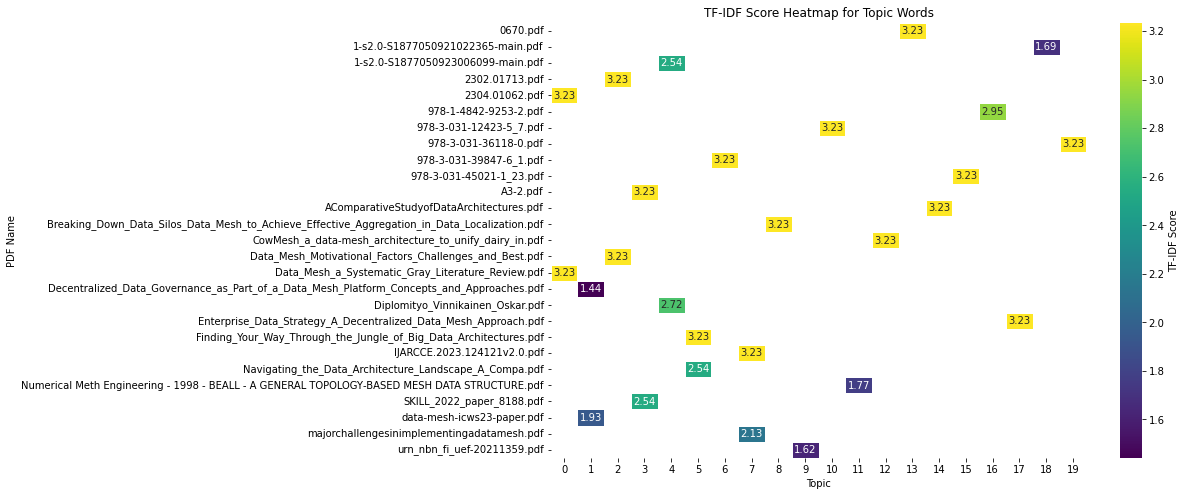

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'pdf_name' is a column in your DataFrame
pdf_names = result['pdf_name']

# Assuming 'topic' is a column in your DataFrame
topics = result['topic']

# Assuming 'tfidf_score' is a column in your DataFrame
tfidf_scores = result['topic_tfidf_scores']

# Create a DataFrame for the heatmap
heatmap_data = pd.pivot_table(result, values='topic_tfidf_scores', index='pdf_name', columns='topic')

# Create a heatmap
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(heatmap_data, cmap='viridis', annot=True, linewidths=.5, fmt=".2f", cbar_kws={'label': 'TF-IDF Score'})

# Set plot labels and title
plt.xlabel('Topic')
plt.ylabel('PDF Name')
plt.title('TF-IDF Score Heatmap for Topic Words')

# Show the plot
plt.show()


In [ ]:
result

In [ ]:
import altair as alt
import altair_viewer
import altair_saver
import os

In [ ]:
heatmap_data = pd.DataFrame({
    'Document': np.repeat(result['pdf_name'].values, len(result['topic_words'][0].split(', '))),
    'Rank': np.tile(np.arange(1, 51), len(result)),
    'TF-IDF Score': result.apply(lambda row: tfidf_model.transform([row['topic_words']])[0].max(), axis=1)
})

# Create the heatmap using Altair
heatmap = alt.Chart(heatmap_data).mark_rect().encode(
    x='Rank:O',
    y='Document:N',
    color='TF-IDF Score:Q',
).properties(
    width=800,
    height=400,
    title='Topic Words TF-IDF Score Heatmap'
)


In [ ]:
chart_file = "heatmap_chart.html"
altair_saver.save(heatmap, chart_file)

# Open the HTML file in the default web browser
os.system(f"start {chart_file}")

In [ ]:
print(heatmap_data)

In [ ]:
word_list = result['topic_words'].str.split(',').explode().tolist()

In [ ]:
len(word_list)

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

In [ ]:
# Use Counter to count word frequencies
word_count = Counter(word_list)

In [ ]:
# Get the 10 most common words
most_common_words = word_count.most_common(50)

# Extract the words and their frequencies
words, frequencies = zip(*most_common_words)

# Create a bar plot
plt.figure(figsize=(10, 20))
plt.barh(words, frequencies)
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 10 Most Frequent Words')
plt.gca().invert_yaxis()  # Invert the y-axis to have the most frequent word at the top
plt.show()

In [ ]:
words

In [ ]:
import csv
csv_file_path = "words2.csv"

# Writing to CSV file
with open(csv_file_path, mode='w', newline='') as file:
    writer = csv.writer(file)
    # Write header
    writer.writerow(['Word'])
    # Write words with spaces
    for words_row in words:
        # Split words and write to CSV
        words = words_row.split()
        for word in words:
            writer.writerow([word])

print(f"CSV file '{csv_file_path}' created successfully.")
